# Reading DataSets

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("E:\\Hackathon\\COVID-19 Cases.csv")
df.head()

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM


In [4]:
df.dtypes

Case_Type                                object
People_Total_Tested_Count               float64
Cases                                     int64
Difference                                int64
Date                                     object
Combined_Key                             object
Country_Region                           object
Province_State                           object
Admin2                                   object
iso2                                     object
iso3                                     object
FIPS                                    float64
Lat                                     float64
Long                                    float64
Population_Count                        float64
People_Hospitalized_Cumulative_Count    float64
Data_Source                              object
Prep_Flow_Runtime                        object
dtype: object

# Data Cleansing

In [86]:
df.drop(columns=['Admin2','iso2','iso3','FIPS','Data_Source','Prep_Flow_Runtime'],inplace=True)

In [87]:
df['Date']=df['Date'].astype('datetime64')

In [89]:
df.dtypes

Case_Type                                       object
People_Total_Tested_Count                      float64
Cases                                            int64
Difference                                       int64
Date                                    datetime64[ns]
Combined_Key                                    object
Country_Region                                  object
Province_State                                  object
Lat                                            float64
Long                                           float64
Population_Count                               float64
People_Hospitalized_Cumulative_Count           float64
dtype: object

In [90]:
df.isna().sum()

Case_Type                                    0
People_Total_Tested_Count               715728
Cases                                        0
Difference                                   0
Date                                         0
Combined_Key                                 0
Country_Region                               0
Province_State                           37128
Lat                                      21420
Long                                     21420
Population_Count                         21420
People_Hospitalized_Cumulative_Count    715728
dtype: int64

    Lets consider the columns "Case_Type,Cases,Differences,Date,Country_Region" for our analysis

# Dimensionality Reduction

In [91]:

df_rolled_up=df.groupby(['Country_Region','Date','Case_Type']).agg({'People_Total_Tested_Count':'sum','Cases':'sum','Difference':'sum','Population_Count':'sum'}).reset_index()

In [92]:
Current_Date = df['Date'].max()

In [93]:
df_rolled_up.query('Date == @Current_Date')

,Country_Region,Date,Case_Type,People_Total_Tested_Count,Cases,Difference,Population_Count
202,Afghanistan,2020-05-02,Confirmed,0.0,2469,134,38928341.0
203,Afghanistan,2020-05-02,Deaths,0.0,72,4,38928341.0
406,Albania,2020-05-02,Confirmed,0.0,789,7,2877800.0
407,Albania,2020-05-02,Deaths,0.0,31,0,2877800.0
610,Algeria,2020-05-02,Confirmed,0.0,4295,141,43851043.0
...,...,...,...,...,...,...,...
37535,Yemen,2020-05-02,Deaths,0.0,2,0,29825968.0
37738,Zambia,2020-05-02,Confirmed,0.0,119,10,18383956.0
37739,Zambia,2020-05-02,Deaths,0.0,3,0,18383956.0
37942,Zimbabwe,2020-05-02,Confirmed,0.0,34,-6,14862927.0


# Visualization

Text(0.5, 0, 'Country')

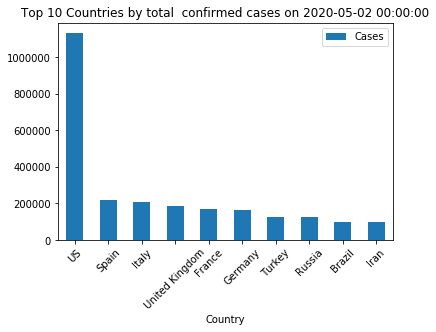

In [94]:
df_rolled_up.query('Date == @Current_Date and Case_Type=="Confirmed"').sort_values('Cases',ascending=False).head(10).plot(kind="bar",x='Country_Region',y='Cases',
rot=45)
plt.title(f"Top 10 Countries by total  confirmed cases on {Current_Date}")
plt.xlabel('Country')

Lets see how cases trend in US daily

Text(0.5, 0, 'Period')

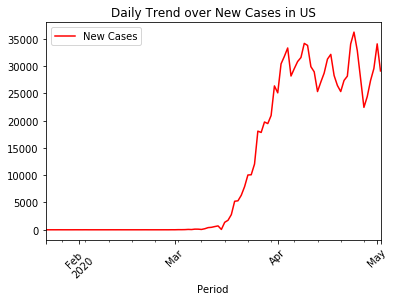

In [95]:
df_rolled_up.query('Case_Type=="Confirmed" and Country_Region=="US"').sort_values('Date').plot(kind="line",x='Date',y='Difference',
rot=45,label='New Cases',color='red')
plt.title(f"Daily Trend over New Cases in US")
plt.xlabel('Period')

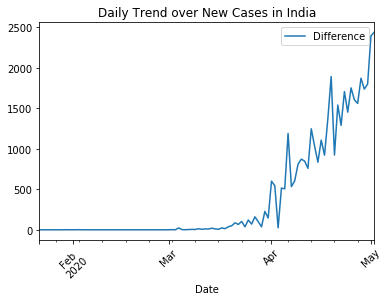

In [84]:
df_rolled_up.query('Case_Type=="Confirmed" and Country_Region=="India"').sort_values('Date').plot(kind="line",x='Date',y='Difference',
rot=45,title="Daily Trend over New Cases in India")

In [110]:
Ind_US = df_rolled_up.query('Case_Type=="Confirmed" and (Country_Region=="India" or Country_Region=="US")').sort_values('Date')

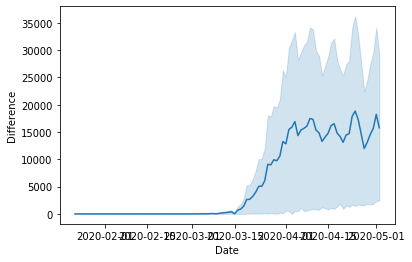

In [111]:
sns.lineplot(data=Ind_US,x='Date',y='Difference',legend="brief")